In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('loan_data_2007_2014.csv').drop(['Unnamed: 0'], axis=1)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_964\1330604866.py:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('loan_data_2007_2014.csv').drop(['Unnamed: 0'], axis=1)


In [3]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df.shape

(466285, 74)

In [8]:
df_redup = df.drop_duplicates()

In [9]:
df_redup.shape

(466285, 74)

In [11]:
df_redup.isnull()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
1,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
2,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
3,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
4,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,False,True,True,True
466281,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,False,True,True,True
466282,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,False,True,True,True
466283,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,False,True,True,True


In [12]:
df_redup.isnull().sum()

id                       0
member_id                0
loan_amnt                0
funded_amnt              0
funded_amnt_inv          0
                     ...  
all_util            466285
total_rev_hi_lim     70276
inq_fi              466285
total_cu_tl         466285
inq_last_12m        466285
Length: 74, dtype: int64

In [13]:
def findMiss(df):
    return round(df.isnull().sum()/df.shape[0]*100,2)

In [14]:
findMiss(df_redup)

id                    0.00
member_id             0.00
loan_amnt             0.00
funded_amnt           0.00
funded_amnt_inv       0.00
                     ...  
all_util            100.00
total_rev_hi_lim     15.07
inq_fi              100.00
total_cu_tl         100.00
inq_last_12m        100.00
Length: 74, dtype: float64

In [15]:
df_redup[df_redup.inq_last_12m.isnull()].describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,4.662850e+05,4.662850e+05,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,4.662810e+05,466285.000000,466256.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,3.960090e+05,0.0,0.0,0.0
mean,1.307973e+07,1.459766e+07,14317.277577,14291.801044,14222.329888,13.829236,432.061201,7.327738e+04,17.218758,0.284678,...,NaN,NaN,NaN,NaN,NaN,NaN,3.037909e+04,NaN,NaN,NaN
std,1.089371e+07,1.168237e+07,8286.509164,8274.371300,8297.637788,4.357587,243.485550,5.496357e+04,7.851121,0.797365,...,NaN,NaN,NaN,NaN,NaN,NaN,3.724713e+04,NaN,NaN,NaN
min,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN
25%,3.639987e+06,4.379705e+06,8000.000000,8000.000000,8000.000000,10.990000,256.690000,4.500000e+04,11.360000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,1.350000e+04,NaN,NaN,NaN
50%,1.010790e+07,1.194108e+07,12000.000000,12000.000000,12000.000000,13.660000,379.890000,6.300000e+04,16.870000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,2.280000e+04,NaN,NaN,NaN
75%,2.073121e+07,2.300154e+07,20000.000000,20000.000000,19950.000000,16.490000,566.580000,8.896000e+04,22.780000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,3.790000e+04,NaN,NaN,NaN
max,3.809811e+07,4.086083e+07,35000.000000,35000.000000,35000.000000,26.060000,1409.990000,7.500000e+06,39.990000,29.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,9.999999e+06,NaN,NaN,NaN


In [16]:
df_redup.inq_last_12m.max()

np.float64(nan)

In [17]:
miss1 = df_redup[df_redup.inq_last_12m.isnull()]
miss2 = df_redup[df_redup.inq_last_12m.notnull()]

In [18]:
miss1.shape

(466285, 74)

In [19]:
miss2.shape

(0, 74)

In [22]:
miss1['inq_last_12m'] = miss1['inq_last_12m'].fillna(0)
miss1['total_cu_tl'] = miss1['total_cu_tl'].fillna(0)
miss1['inq_fi'] = miss1['inq_fi'].fillna(0)
miss1['total_rev_hi_lim'] = miss1['total_rev_hi_lim'].fillna(0)
miss1['all_util'] = miss1['all_util'].fillna(0)
miss1['max_bal_bc'] = miss1['max_bal_bc'].fillna(0)
miss1['open_rv_24m'] = miss1['open_rv_24m'].fillna(0)
miss1['open_rv_12m'] = miss1['open_rv_12m'].fillna(0)
miss1['il_util'] = miss1['il_util'].fillna(0)
miss1['total_bal_il'] = miss1['total_bal_il'].fillna(0)


In [23]:
findMiss(miss1)

id                  0.0
member_id           0.0
loan_amnt           0.0
funded_amnt         0.0
funded_amnt_inv     0.0
                   ... 
all_util            0.0
total_rev_hi_lim    0.0
inq_fi              0.0
total_cu_tl         0.0
inq_last_12m        0.0
Length: 74, dtype: float64

In [26]:
filled_df = pd.concat([miss2, miss1], ignore_index=True)

In [27]:
findMiss(filled_df)

id                  0.0
member_id           0.0
loan_amnt           0.0
funded_amnt         0.0
funded_amnt_inv     0.0
                   ... 
all_util            0.0
total_rev_hi_lim    0.0
inq_fi              0.0
total_cu_tl         0.0
inq_last_12m        0.0
Length: 74, dtype: float64

In [28]:
filled_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
filled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   member_id                    466285 non-null  int64  
 2   loan_amnt                    466285 non-null  int64  
 3   funded_amnt                  466285 non-null  int64  
 4   funded_amnt_inv              466285 non-null  float64
 5   term                         466285 non-null  object 
 6   int_rate                     466285 non-null  float64
 7   installment                  466285 non-null  float64
 8   grade                        466285 non-null  object 
 9   sub_grade                    466285 non-null  object 
 10  emp_title                    438697 non-null  object 
 11  emp_length                   445277 non-null  object 
 12  home_ownership               466285 non-null  object 
 13 

In [32]:
filled_df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,4.662850e+05,4.662850e+05,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,4.662810e+05,466285.000000,466256.000000,...,466285.0,466285.0,466285.0,466285.0,466285.0,466285.0,4.662850e+05,466285.0,466285.0,466285.0
mean,1.307973e+07,1.459766e+07,14317.277577,14291.801044,14222.329888,13.829236,432.061201,7.327738e+04,17.218758,0.284678,...,0.0,0.0,0.0,0.0,0.0,0.0,2.580051e+04,0.0,0.0,0.0
std,1.089371e+07,1.168237e+07,8286.509164,8274.371300,8297.637788,4.357587,243.485550,5.496357e+04,7.851121,0.797365,...,0.0,0.0,0.0,0.0,0.0,0.0,3.600534e+04,0.0,0.0,0.0
min,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0
25%,3.639987e+06,4.379705e+06,8000.000000,8000.000000,8000.000000,10.990000,256.690000,4.500000e+04,11.360000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,8.900000e+03,0.0,0.0,0.0
50%,1.010790e+07,1.194108e+07,12000.000000,12000.000000,12000.000000,13.660000,379.890000,6.300000e+04,16.870000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.920000e+04,0.0,0.0,0.0
75%,2.073121e+07,2.300154e+07,20000.000000,20000.000000,19950.000000,16.490000,566.580000,8.896000e+04,22.780000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,3.430000e+04,0.0,0.0,0.0
max,3.809811e+07,4.086083e+07,35000.000000,35000.000000,35000.000000,26.060000,1409.990000,7.500000e+06,39.990000,29.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,9.999999e+06,0.0,0.0,0.0


<Axes: ylabel='out_prncp'>

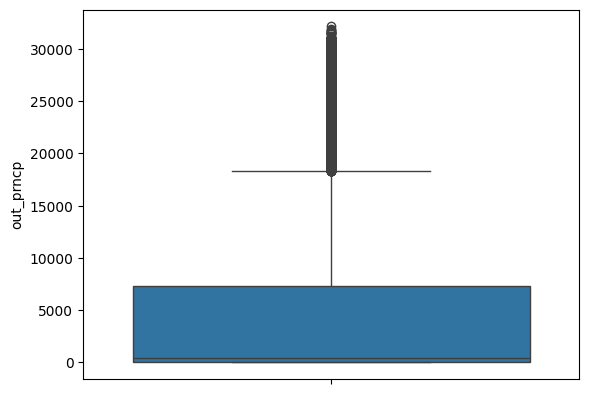

In [40]:
sns.boxplot(filled_df['out_prncp'])

In [41]:
filled_df.groupby(['funded_amnt']).size()

funded_amnt
500         11
550          1
600          6
700          3
725          1
         ...  
34900        5
34925        2
34950        2
34975       15
35000    16458
Length: 1354, dtype: int64

In [43]:
filled_df.groupby(['acc_now_delinq']).size()

acc_now_delinq
0.0    464524
1.0      1623
2.0        92
3.0        11
4.0         4
5.0         2
dtype: int64

In [44]:
filled_df[filled_df['acc_now_delinq']>=2].groupby(['grade']).size()

grade
A     3
B    17
C    30
D    36
E    13
F     7
G     3
dtype: int64

In [45]:
filled_df.groupby(['max_bal_bc']).size()

max_bal_bc
0.0    466285
dtype: int64

In [42]:
filled_df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,8598660,1440975,18400,18400,18400.0,60 months,14.47,432.64,C,C2,...,0.0,0.0,0.0,0.0,0.0,0.0,29900.0,0.0,0.0,0.0
466281,9684700,11536848,22000,22000,22000.0,60 months,19.97,582.50,D,D5,...,0.0,0.0,0.0,0.0,0.0,0.0,39400.0,0.0,0.0,0.0
466282,9584776,11436914,20700,20700,20700.0,60 months,16.99,514.34,D,D1,...,0.0,0.0,0.0,0.0,0.0,0.0,13100.0,0.0,0.0,0.0
466283,9604874,11457002,2000,2000,2000.0,36 months,7.90,62.59,A,A4,...,0.0,0.0,0.0,0.0,0.0,0.0,53100.0,0.0,0.0,0.0


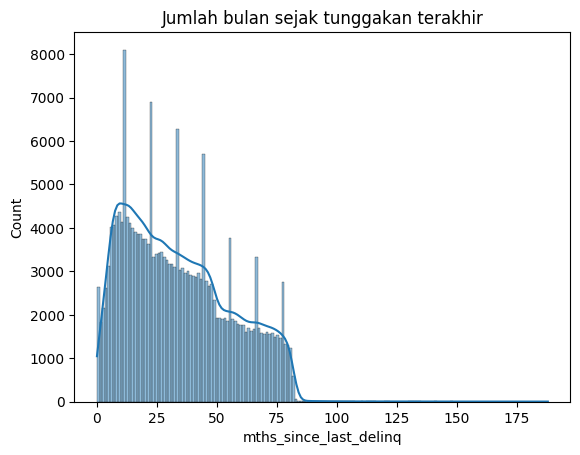

In [34]:
# Histogram untuk distribusi penunggak pinjaman
sns.histplot(df['mths_since_last_delinq'], kde=True)
plt.title('Jumlah bulan sejak tunggakan terakhir')
plt.show()

<Axes: xlabel='open_acc', ylabel='Density'>

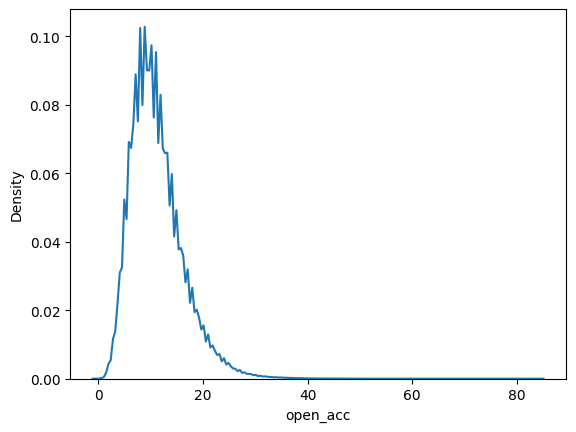

In [48]:
# Histogram untuk distribusi penunggak pinjaman
sns.kdeplot(filled_df['open_acc'])


In [53]:
filled_df[filled_df['open_acc']>=.08]['out_prncp'].describe()

count    466249.000000
mean       4410.398224
std        6355.208455
min           0.000000
25%           0.000000
50%         443.570000
75%        7342.070000
max       32160.380000
Name: out_prncp, dtype: float64

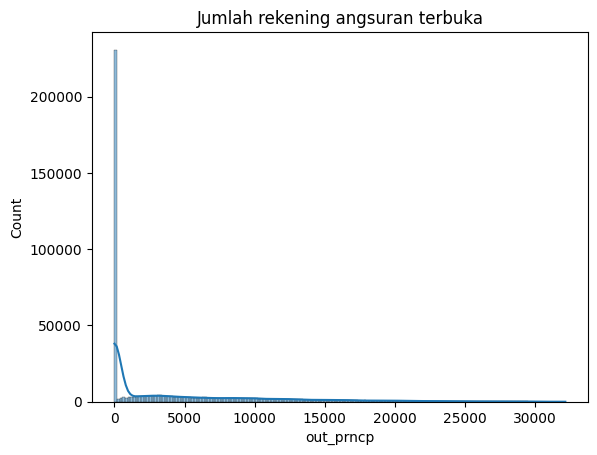

In [38]:
# Histogram
sns.histplot(df['out_prncp'], kde=True)
plt.title('Jumlah sisa pokok terutang')
plt.show()

In [54]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

[0]


<Axes: xlabel='annual_inc'>

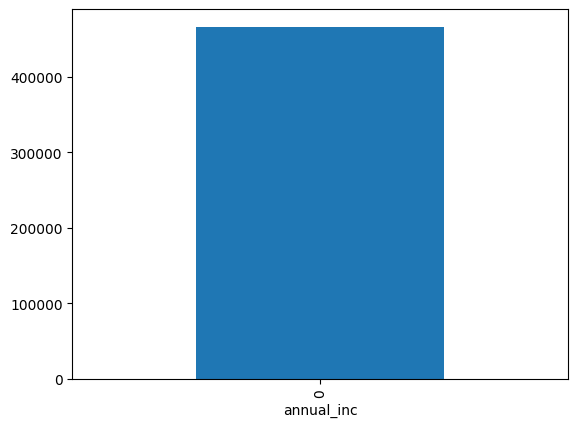

In [84]:
filled_df['annual_inc'] = [1 if value == "30000" else 0 for value in filled_df['annual_inc']]
filled_df['annual_inc'].value_counts().plot(kind='bar')


In [61]:
filled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   member_id                    466285 non-null  int64  
 2   loan_amnt                    466285 non-null  int64  
 3   funded_amnt                  466285 non-null  int64  
 4   funded_amnt_inv              466285 non-null  float64
 5   term                         466285 non-null  int64  
 6   int_rate                     466285 non-null  float64
 7   installment                  466285 non-null  float64
 8   grade                        466285 non-null  int64  
 9   sub_grade                    466285 non-null  object 
 10  emp_title                    438697 non-null  object 
 11  emp_length                   445277 non-null  object 
 12  home_ownership               466285 non-null  object 
 13 

In [56]:
filled_df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,8598660,1440975,18400,18400,18400.0,60 months,14.47,432.64,C,C2,...,0.0,0.0,0.0,0.0,0.0,0.0,29900.0,0.0,0.0,0.0
466281,9684700,11536848,22000,22000,22000.0,60 months,19.97,582.50,D,D5,...,0.0,0.0,0.0,0.0,0.0,0.0,39400.0,0.0,0.0,0.0
466282,9584776,11436914,20700,20700,20700.0,60 months,16.99,514.34,D,D1,...,0.0,0.0,0.0,0.0,0.0,0.0,13100.0,0.0,0.0,0.0
466283,9604874,11457002,2000,2000,2000.0,36 months,7.90,62.59,A,A4,...,0.0,0.0,0.0,0.0,0.0,0.0,53100.0,0.0,0.0,0.0


grade
0    466285
dtype: int64

In [78]:
print(filled_df['grade'].isnull().sum())

0


In [86]:
#divide into target
y = filled_df['funded_amnt']
X = filled_df.drop(['funded_amnt'], axis=1)

In [87]:
y

0          5000
1          2500
2          2400
3         10000
4          3000
          ...  
466280    18400
466281    22000
466282    20700
466283     2000
466284    10000
Name: funded_amnt, Length: 466285, dtype: int64

In [88]:
X

,id,member_id,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,0,4975.0,0,10.65,162.87,0,B2,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1077430,1314167,0,2500.0,0,15.27,59.83,0,C4,Ryder,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1077175,1313524,0,2400.0,0,15.96,84.33,0,C5,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1076863,1277178,0,10000.0,0,13.49,339.31,0,C1,AIR RESOURCES BOARD,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1075358,1311748,0,3000.0,0,12.69,67.79,0,B5,University Medical Group,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,8598660,1440975,0,18400.0,0,14.47,432.64,0,C2,Financial Advisor,...,0.0,0.0,0.0,0.0,0.0,0.0,29900.0,0.0,0.0,0.0
466281,9684700,11536848,0,22000.0,0,19.97,582.50,0,D5,Chief of Interpretation (Park Ranger),...,0.0,0.0,0.0,0.0,0.0,0.0,39400.0,0.0,0.0,0.0
466282,9584776,11436914,0,20700.0,0,16.99,514.34,0,D1,patrol,...,0.0,0.0,0.0,0.0,0.0,0.0,13100.0,0.0,0.0,0.0
466283,9604874,11457002,0,2000.0,0,7.90,62.59,0,A4,Server Engineer Lead,...,0.0,0.0,0.0,0.0,0.0,0.0,53100.0,0.0,0.0,0.0


In [91]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)



ValueError: could not convert string to float: 'B2'